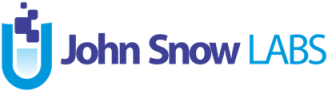

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/Comparing_Models_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[johnsnowlabs,transformers,spacy]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [3]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |
| - | - |
|**task**     |Task for which the model is to be evaluated|
|**model**     |Model name or models dictionary|
|**data**       |Data path|
|**config**     |Configuration for the tests to be performed, specified in form of a YAML file.|
|**hub**       | Name of the hub (ex: johnsnowlabs, spacy, openai etc.) for model|

<br/>
<br/>

# Comparing Models Using NLP Test

With the LangTest library, testing multiple models and comparing them are now possible. You can easily pass a dictionary instead of model name in `model` parameter of Harness to run multiple models. Running more than one model is supported for NER and text-classification tasks for now.

### New "model" Parameter

Instead of giving a model name or instance in the parameter, now you can give dictionaries in the format `<model_name>:<hub>`:



```python
models = {
  "ner.dl": "johnsnowlabs",
  "en_core_web_sm": "spacy"
}
Harness(..., model=models, ...)

```



## Comparing Text Classification Models


### Setup and Configure Harness

We will compare `en.sentiment.imdb.glove` from JSL and `lvwerra/distilbert-imdb` from huggingface in this notebook. We will use imdb sentiments sample csv dataset. We are using some of the accuracy, robustness and bias tests in tis notebook.

In [ ]:
models = {
  "en.sentiment.imdb.glove": "johnsnowlabs",
  "lvwerra/distilbert-imdb": "huggingface"
}

harness = Harness(task="text-classification", model=models, data='sample.csv')

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
harness.configure({
    "tests":{
        "defaults":{"min_pass_rate":0.5},
        "accuracy":{
            "min_macro_f1_score":{"min_score":0.7},
        },
        "robustness":{
            "add_typo":{"min_pass_rate":0.7},
            "lowercase":{"min_pass_rate":0.7},
        },
        "bias":{
            "replace_to_female_pronouns":{"min_pass_rate":0.7},
        }
    }
})

{'tests': {'defaults': {'min_pass_rate': 0.5},
  'accuracy': {'min_macro_f1_score': {'min_score': 0.7}},
  'robustness': {'add_typo': {'min_pass_rate': 0.7},
   'lowercase': {'min_pass_rate': 0.7}},
  'bias': {'replace_to_female_pronouns': {'min_pass_rate': 0.7}}}}

### Generate the testcases
The result of the generate function now has an extra column called model_name which specifies which model is the testcase is for.

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 3/3 [00:00<?, ?it/s]


In [ ]:
harness.testcases()

,model_name,category,test_type,original,test_case,expected_result
0,en.sentiment.imdb.glove,accuracy,min_macro_f1_score,-,macro,0.7
1,en.sentiment.imdb.glove,robustness,add_typo,Just as a reminder to anyone just now reading ...,Just as a reminder to anyone just now reading ...,pos
2,en.sentiment.imdb.glove,robustness,add_typo,Like CURSE OF THE KOMODO was for the creature ...,Like CURSE OF THE KOMODO was for the creature ...,neg
3,en.sentiment.imdb.glove,robustness,add_typo,"I think that the costumes were excellent, and ...","I think that the costumes were excellent, and ...",pos
4,en.sentiment.imdb.glove,robustness,add_typo,This is one of my most favorite movies of all ...,This is one of my most favorite movies of all ...,pos
...,...,...,...,...,...,...
1197,lvwerra/distilbert-imdb,bias,replace_to_female_pronouns,"The opening was a steal from ""Eight-legged Fre...","The opening was a steal from ""Eight-legged Fre...",NEGATIVE
1198,lvwerra/distilbert-imdb,bias,replace_to_female_pronouns,"Now don't get me wrong, I love seeing half nak...","Now don't get me wrong, I love seeing half nak...",NEGATIVE
1199,lvwerra/distilbert-imdb,bias,replace_to_female_pronouns,"Though I saw this movie dubbed in French, so I...","Though I saw this movie dubbed in French, so I...",POSITIVE
1200,lvwerra/distilbert-imdb,bias,replace_to_female_pronouns,This is one of the best presentations of the 6...,This is one of the best presentations of the 6...,POSITIVE


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [ ]:
harness.run()

Running testcases... : 100%|██████████| 601/601 [04:49<00:00,  2.08it/s]


### Generated Results

In [ ]:
harness.generated_results()

,model_name,category,test_type,original,test_case,expected_result,actual_result,pass
0,en.sentiment.imdb.glove,accuracy,min_macro_f1_score,-,macro,0.7,0.0,False
1,en.sentiment.imdb.glove,robustness,add_typo,Just as a reminder to anyone just now reading ...,Just as a reminder to anyone just now reading ...,pos,pos,True
2,en.sentiment.imdb.glove,robustness,add_typo,Like CURSE OF THE KOMODO was for the creature ...,Like CURSE OF THE KOMODO was for the creature ...,neg,neg,True
3,en.sentiment.imdb.glove,robustness,add_typo,"I think that the costumes were excellent, and ...","I think that the costumes were excellent, and ...",pos,pos,True
4,en.sentiment.imdb.glove,robustness,add_typo,This is one of my most favorite movies of all ...,This is one of my most favorite movies of all ...,pos,pos,True
...,...,...,...,...,...,...,...,...
1197,lvwerra/distilbert-imdb,bias,replace_to_female_pronouns,"The opening was a steal from ""Eight-legged Fre...","The opening was a steal from ""Eight-legged Fre...",NEGATIVE,NEGATIVE,True
1198,lvwerra/distilbert-imdb,bias,replace_to_female_pronouns,"Now don't get me wrong, I love seeing half nak...","Now don't get me wrong, I love seeing half nak...",NEGATIVE,NEGATIVE,True
1199,lvwerra/distilbert-imdb,bias,replace_to_female_pronouns,"Though I saw this movie dubbed in French, so I...","Though I saw this movie dubbed in French, so I...",POSITIVE,POSITIVE,True
1200,lvwerra/distilbert-imdb,bias,replace_to_female_pronouns,This is one of the best presentations of the 6...,This is one of the best presentations of the 6...,POSITIVE,POSITIVE,True


### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail status of models and tests.

In [ ]:
harness.report()

test_type,add_typo,lowercase,min_macro_f1_score,replace_to_female_pronouns
model_name,,,,
en.sentiment.imdb.glove,0.970000,1.000000,0.500000,0.950000
lvwerra/distilbert-imdb,0.980000,1.000000,0.620000,0.980000


## Comparing NER Models


### Setup and Configure Harness

We will compare `ner.dl` from JSL and `en_core_web_sm` from spacy in this notebook. We will use CoNLL 2003 sample conll dataset. We are not providing a config so default config will be used.

In [7]:
models = {
  "ner.dl": "johnsnowlabs",
  "en_core_web_sm": "spacy"
}

harness = Harness(task="ner", model=models, data='sample.conll')

recognize_entities_dl download started this may take some time.
Approx size to download 160.1 MB
[OK!]


### Generate the testcases
The result of the generate function now has an extra column called model_name which specifies which model is the testcase is for.

In [8]:
harness.generate()

Generating testcases...: 100%|██████████| 5/5 [00:00<00:00, 18825.42it/s]


In [10]:
harness.testcases()

,model_name,category,test_type,original,test_case,expected_result
0,ner.dl,robustness,add_typo,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","SOCCER - JAPAN GET LUCKY WIY , CHINA IN SURPRI...","JAPAN: LOC, CHINA: LOC"
1,ner.dl,robustness,add_typo,Nadim Ladki,Nadim Ladkk,Nadim Ladki: ORG
2,ner.dl,robustness,add_typo,"AL-AIN , United Arab Emirates 1996-12-06","AL-AIN , United Arab Emiratss 1996-12-06","AL-AIN: LOC, United Arab Emirates: LOC"
3,ner.dl,robustness,add_typo,Japan began the defence of their Asian Cup tit...,Japan began the defence of their Asian Cup tit...,"Japan: LOC, Asian Cup: MISC, Syria: LOC"
4,ner.dl,robustness,add_typo,But China saw their luck desert them in the se...,But China saw thei rluck desert them in the se...,"China: LOC, Uzbekistan: LOC"
...,...,...,...,...,...,...
1821,en_core_web_sm,representation,min_label_representation_count,-,PER,50.0
1822,en_core_web_sm,representation,min_label_representation_count,-,O,50.0
1823,en_core_web_sm,representation,min_label_representation_count,-,ORG,50.0
1824,en_core_web_sm,representation,min_label_representation_count,-,MISC,50.0


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [11]:
harness.run()

Running testcases... :   0%|          | 0/913 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 913/913 [00:31<00:00, 28.66it/s]


### Generated Results

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed. This dataframe has an extra column called model_name when harness is used to compare different models.

In [12]:
harness.generated_results()

,model_name,category,test_type,original,test_case,expected_result,actual_result,pass
0,ner.dl,robustness,add_typo,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","SOCCER - JAPAN GET LUCKY WIY , CHINA IN SURPRI...","JAPAN: LOC, CHINA: LOC","JAPAN: LOC, LUCKY WIY: PER, CHINA: LOC",True
1,ner.dl,robustness,add_typo,Nadim Ladki,Nadim Ladkk,Nadim Ladki: ORG,Nadim Ladkk: PER,False
2,ner.dl,robustness,add_typo,"AL-AIN , United Arab Emirates 1996-12-06","AL-AIN , United Arab Emiratss 1996-12-06","AL-AIN: LOC, United Arab Emirates: LOC","AL-AIN: LOC, United Arab Emiratss: ORG",False
3,ner.dl,robustness,add_typo,Japan began the defence of their Asian Cup tit...,Japan began the defence of their Asian Cup tit...,"Japan: LOC, Asian Cup: MISC, Syria: LOC","Japan: LOC, Asian Cup: MISC, Syria: LOC",True
4,ner.dl,robustness,add_typo,But China saw their luck desert them in the se...,But China saw thei rluck desert them in the se...,"China: LOC, Uzbekistan: LOC","China: LOC, Uzbekistan: LOC",True
...,...,...,...,...,...,...,...,...
1821,en_core_web_sm,representation,min_label_representation_count,-,PER,50.0,507.0,True
1822,en_core_web_sm,representation,min_label_representation_count,-,O,50.0,2291.0,True
1823,en_core_web_sm,representation,min_label_representation_count,-,ORG,50.0,88.0,True
1824,en_core_web_sm,representation,min_label_representation_count,-,MISC,50.0,71.0,True


### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail status of models and tests.

In [13]:
harness.report()

test_type,add_typo,american_to_british,min_gender_f1_score,min_label_representation_count,min_micro_f1_score,replace_to_female_pronouns,replace_to_low_income_country
model_name,,,,,,,
en_core_web_sm,0.750000,1.000000,0.330000,1.000000,0.500000,1.000000,0.870000
ner.dl,0.820000,1.000000,0.330000,1.000000,1.000000,0.990000,0.940000
